# Discrete Fourier Transform in Python

In [1]:
def compute_fft(s, sampling_rate, n = None, scale_amplitudes = True):
    '''Computes an FFT on signal s using numpy.fft.fft.
    
       Parameters:
        s (np.array): the signal
        sampling_rate (num): sampling rate
        n (integer): If n is smaller than the length of the input, the input is cropped. If n is 
            larger, the input is padded with zeros. If n is not given, the length of the input signal 
            is used (i.e., len(s))
        scale_amplitudes (boolean): If true, the spectrum amplitudes are scaled by 2/len(s)
    '''
    if n == None:
        n = len(s)
        
    fft_result = np.fft.fft(s, n)
    num_freq_bins = len(fft_result)
    fft_freqs = np.fft.fftfreq(num_freq_bins, d = 1 / sampling_rate)
    half_freq_bins = num_freq_bins // 2

    fft_freqs = fft_freqs[:half_freq_bins]
    fft_result = fft_result[:half_freq_bins]
    fft_amplitudes = np.abs(fft_result)
    
    if scale_amplitudes is True:
        fft_amplitudes = 2 * fft_amplitudes / (len(s))
    
    return (fft_freqs, fft_amplitudes);


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

$N$: Number of samples
$f_s$: Sampling rate

In [3]:
N = 1000
f_s = 100

The period $T_s$ between the sample is given as

In [4]:
T_s = 1/f_s
print(T_s, "seconds or")
print(T_s*1000, "ms") #dont confuse with N=1000, it is just that we converted Ts to ms
t = np.linspace(0,T_s*N,N)

0.01 seconds or
10.0 ms


$$s(t) = 0.1sin(2\pi5t) + sin(2\pi3t-0.25\pi)$$

Text(0.5, 1.0, 'Visualizing samples')

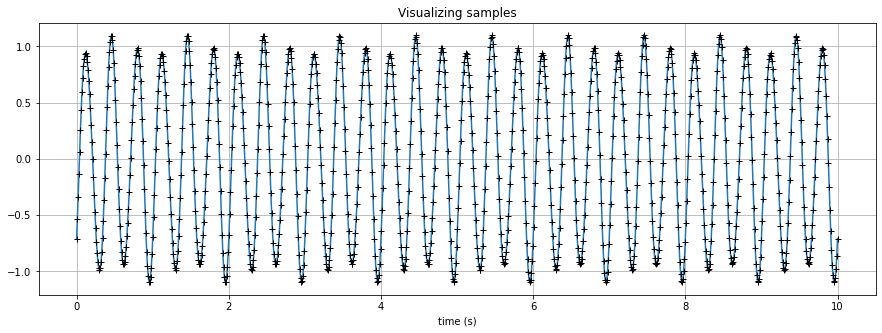

In [5]:
x_t = 0.1*np.sin(2*np.pi*5*t) + np.sin(2*np.pi*3*t-np.pi/4)
plt.figure(figsize=(15,5))
plt.plot(t, x_t)
plt.plot(t, x_t, "k+")
plt.xlabel("time (s)")
plt.grid()
plt.title("Visualizing samples")

Note that we can describe the **period** of each sinus component in number of samples:


<ol>
<li>$0.1sin(2\pi ft) : f=5, T = 1/f = 1/5 = 0.2s $<br>
Each cycle takes $0.2s$. Number of samples required for $0.2s$ is $\frac{0.2s}{0.01s} = 20$ samples = $s_i$</li>
    
<li>$0.1sin(2\pi ft) : f=3, T = 1/f = 1/3 = 0.33s $<br>
Each cycle takes $0.33s$. Number of samples required for $0.33s$ is $\frac{0.33s}{0.01s} = 33$ samples = $s_i$ </li>    
</ol>
It means tha thtese components repeat after $20$ and $33$ samples respectively<br>

In total, we have 1000 samples. The first component repeats after every 20 samples ($\frac{1000}{20}=50$), and the second component repeats after every 33 samples ($\frac{1000}{33}=33.30$)

# FFT

Note the varaible type:  complex128


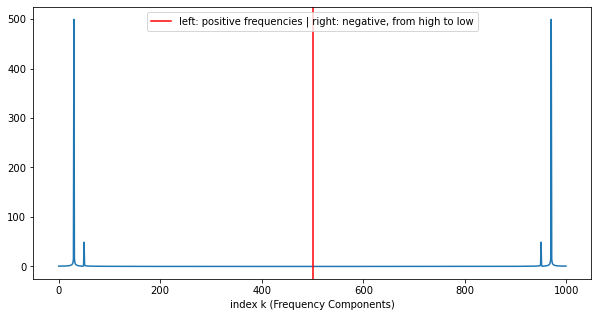

In [6]:
a_f = fft(x_t)
print("Note the varaible type: ",a_f.dtype)
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f)) # we take abs in order to get the magnitude of a complex number
plt.axvline(N//2, color="red", label="left: positive frequencies | right: negative, from high to low")
plt.xlabel("index k (Frequency Components)")
plt.legend()

In [7]:
a_f_positive = a_f[:N//2]

Each element in ```a_f``` represents the real and imiginary part (amplitude $A_i$ and phase $\phi_i$) for a specefic frequency $f_i$. <br>

The frequency after the FFT is defined as $\frac{N}{s_i}$ in the period of specific sinus component. The period $s_i$ is expressed in number of samples. The frequency in the above plot appears as the number of samples: 

<ol>
<li>$\frac{N}{s_i} = \frac{1000}{20} = 50$ with a low amplitude because of $0.1$ in $0.1sin(2\pi 5t)$</li>
<li>$\frac{N}{s_i} = \frac{1000}{33} = 33.3$ with a high amplitude</li>
</ol>

Text(0.5, 0, 'frequency in $k = N/s_i$')

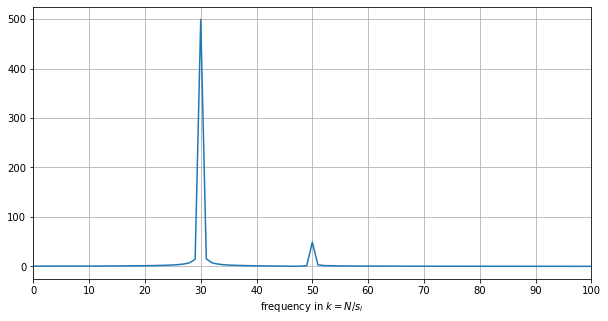

In [31]:
plt.figure(figsize=(10,5))
plt.plot(np.abs(a_f_positive))
plt.xlim([0, 100])
plt.xticks(range(0, 101, 10))
plt.grid()
plt.xlabel("frequency in $k = N/s_i$")

In order to relate the sample-frequencies ($\frac{N}{1}$ into time domain we need to convert the $k$ into frequencies as $\frac{1}{s}$<br><br>

$k=\frac{N}{s_i} = \frac{N}{\frac{T_i}{T_s}} = \frac{Nf_i}{\frac{1}{T_s}} = \frac{Nf_i}{f_s}$ <br><br>

Therefore, we have, $f_i = f_s\frac{k}{N}$



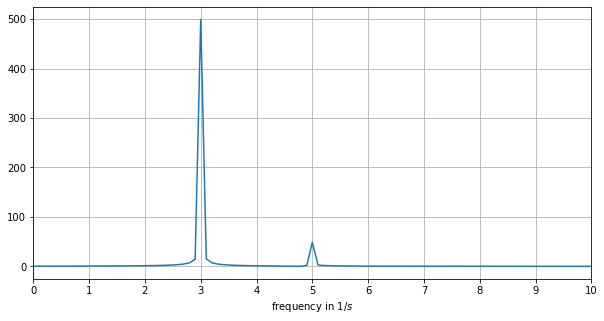

In [9]:
f_i = np.arange(0, N//2)*f_s/N
plt.figure(figsize=(10,5))
plt.plot(f_i, np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);

We need to normalize the magnitude of the peaks by the factor of $\frac{2}{N}$

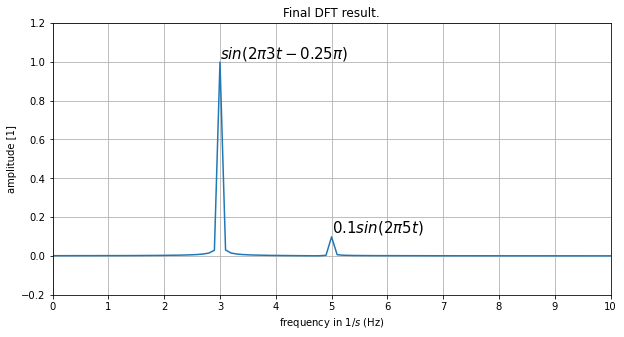

In [10]:
plt.figure(figsize=(10,5))
plt.plot(f_i, 2/N*np.abs(a_f_positive))
plt.grid()
plt.xlabel("frequency in $1/s$ (Hz)")
plt.ylabel("amplitude [1]")
plt.xticks(range(0, f_s//2, 1));
plt.xlim([0, 10]);
plt.ylim([-0.2, 1.2]);
plt.title("Final DFT result.")
plt.text(3, 1.02, "$sin(2\pi 3t - 0.25\pi)$", fontdict={"size": 15})
plt.text(5, 0.12, "$0.1 sin(2\pi 5t)$", fontdict={"size": 15});

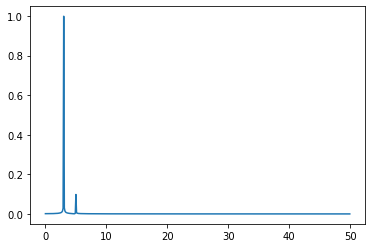

In [11]:
# let us try to get FFT with the function that we built previously.
F,A = compute_fft(x_t, f_s, n = None, scale_amplitudes = True)
plt.plot(F[:],A[:])

## Phase

We could find the magnitudes and the frequencies of both signals but not the $45^\circ $ phase of the slower $3 Hz$ signal. In the previous section we saw that the result of the FFT algorithm is a complex array. Let's plot the real and imaginary parts relative to frequency.

(0.0, 10.0)

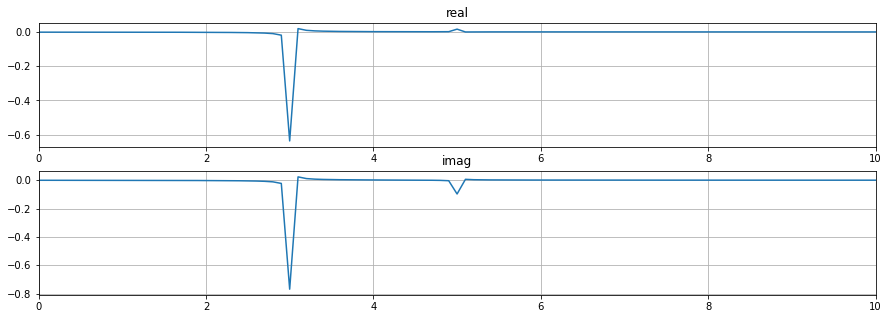

In [12]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 1, 1)
plt.title("real")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(2, 1, 2)
plt.title("imag")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])

Lets calcualte the angle of the complex number which is $\alpha = artan\frac{imag}{real}$

In [13]:
angle = np.angle(a_f_positive, deg=True)

(-150.0, 100.0)

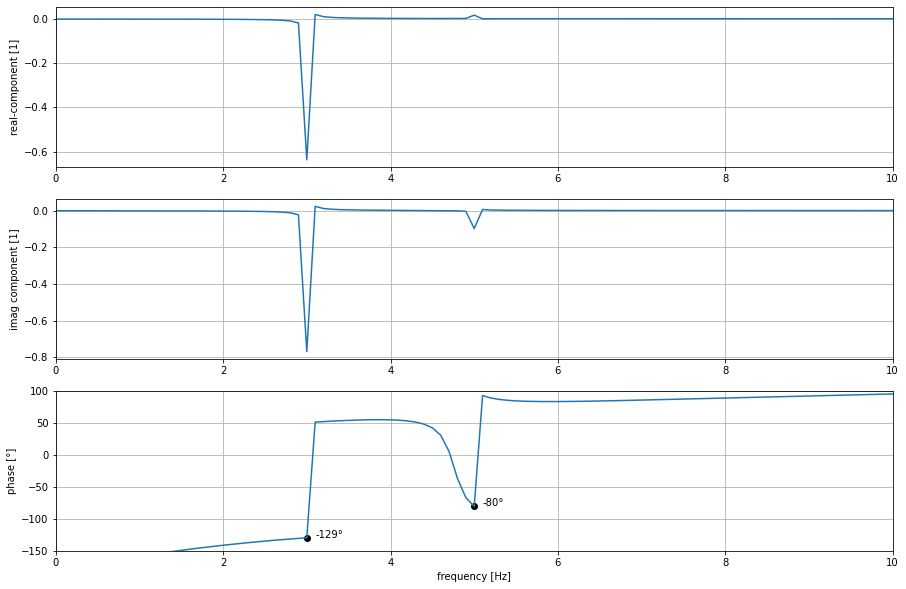

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.ylabel("real-component [1]")
plt.plot(f_i, 2/N*np.real(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 2)
plt.ylabel("imag component [1]")
plt.plot(f_i, 2/N*np.imag(a_f_positive))
plt.grid()
plt.xlim([0, 10])
plt.subplot(3, 1, 3)
plt.plot(f_i, angle)
plt.grid()
plt.ylabel("phase [°]")
plt.xlabel("frequency [Hz]")
plt.xlim([0, 10])

plt.scatter(f_i[[30, 50]], angle[[30, 50]], color="k")
plt.text(f_i[30] + 0.1 , angle[30], "%d°" % int(angle[30]))
plt.text(f_i[50] + 0.1 , angle[50], "%d°" % int(angle[50]))
plt.ylim([-150, 100])

## FFT on Complex Numbers

Because within the multi-chirp FMCW algorithm we do a FFT on a series of complex numbers we want to make a simple example here.<br>
let, $$f(t) = 0.25sin(2\pi 5t + \phi)$$<br>
$$\phi = \phi(t) = -\frac{\pi}{8}t = vt$$<br>

The phase shift is time dependent


In [81]:
def f(t, phi=0):
    return 0.25*np.sin(2*np.pi*5*t + phi)

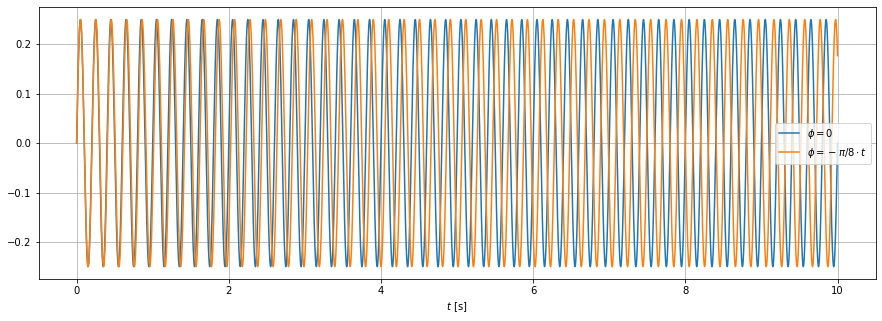

In [82]:
t = np.linspace(0, 10, 10000)
plt.figure(figsize=(15,5))
plt.plot(t, f(t), label="$\phi=0$")
plt.plot(t, f(t, -np.pi/8*t), label="$\phi=-\pi/8 \cdot t$")
#plt.xlim([0, 4])
plt.xlabel("$t$ [s]")
plt.grid()
plt.legend();

Text(0, 0.5, 'Amplitude')

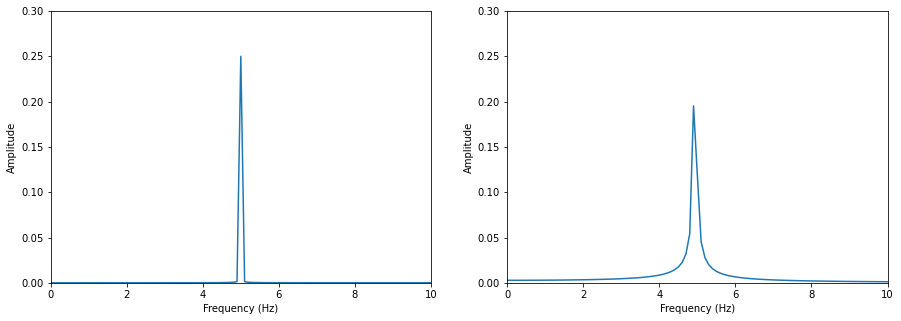

In [91]:
#lets compute the fft of the two waveforms above
fig, ax = plt.subplots(1,2, figsize=(15,5))
F,A = compute_fft(f(t), 1000)
ax[0].plot(F,A)
ax[0].set_xlim(0,10)
ax[0].set_ylim(0,0.30)
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude')
F,A = compute_fft(f(t, -np.pi/8*t), 1000)
ax[1].plot(F,A)
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,0.30)
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude')

For the sake of our example we will run FFT each $T_{cycle}$ seconds

In [26]:
T_cycle = 2 # seconds
n_cycles = 200
f_cycle = 1/T_cycle
f_s = 100
T_s = 1/f_s
N = int(T_cycle/T_s)
print("Sample frequency:", f_s, "Hz")
print("Sample period:", T_s, "sec")
print("Number of samples required to complete 2 cycles:", N)

Sample frequency: 100 Hz
Sample period: 0.01 sec
Number of samples required to complete 2 cycles: 200


We run FFT in each cycle and save the results in a list.

In [27]:
fft_cycle_results = list() # result list

# for each cycle
for c in range(n_cycles):
    # determine start and end of a cycle
    t_start = c*T_cycle
    t_end = (c+1)*T_cycle
    
    # sample the signal at according timesteps
    t_sample = np.arange(t_start, t_end, T_s)
    f_sample = f(t_sample, -np.pi/8*t_sample)
    
    # run FFT and append results
    fft_res = fft(f_sample)
    fft_cycle_results.append(fft_res)

We cut the positive frequency range and normalize the amplitudes (see introdcutory example above).

In [28]:
fft_cycle_results = [2/N*r[:N//2] for r in fft_cycle_results]

In [29]:
freq = np.arange(0, N//2)*f_s/N

**Note:** The FFT frequency resolution is at $1Hz$. That's important because the frequency shift by $\frac{1}{8}Hz$ introduced by $\phi(t)$ is not visible in the FFT!<br>

The FFT will show a peak at 5Hz with a different phase each time.

Because the frequency is almost the same in each cycle, we expect the same behaviour in each result:

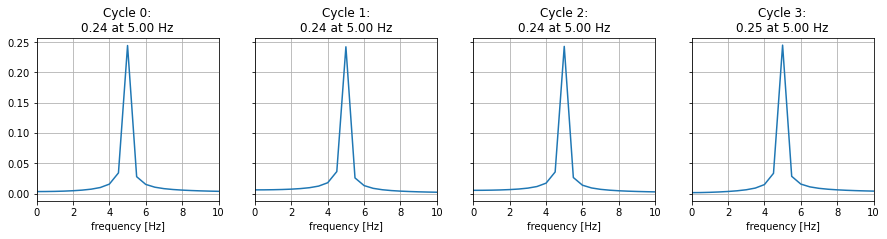

In [50]:
n_cycles_to_display = 4
fft_res_display = fft_cycle_results[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(fft_res_display), figsize=(15, 3), sharex=True, sharey=True)
for i, ax, res in zip(range(n_cycles_to_display), ax, fft_res_display):
    res_abs = np.abs(res)
    ax.plot(freq, res_abs)
    ax.grid(True)
    ax.set_xlim([0, 10])
    ax.set_xlabel("frequency [Hz]")
    
    k = np.argmax(res_abs)
    magn_max = res_abs[k]
    freq_max = freq[k]
    
    ax.set_title("Cycle %d:\n%.2f at %.2f Hz" % (i, magn_max, freq_max))

Looks fine for the first 4 cycles ... Let's look at all cycles by picking the frequency with max. magnitude from each cycle:

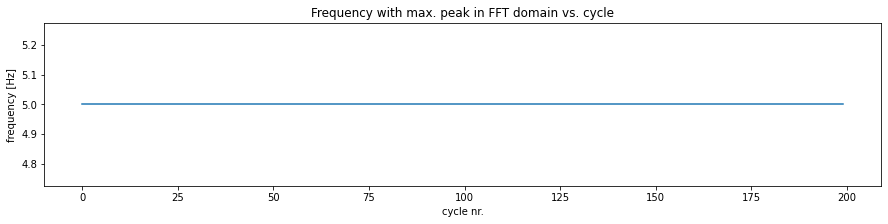

In [33]:
freq_list = list()
for res in fft_cycle_results:
    res_abs = np.abs(res)
    k = np.argmax(res_abs)
    freq_list.append(freq[k])
    
plt.figure(figsize=(15,3))
plt.plot(freq_list)
plt.xlabel("cycle nr.")
plt.ylabel("frequency [Hz]")
plt.title("Frequency with max. peak in FFT domain vs. cycle");

It seems that the position (frequency) of the peaks remains equal, despite the changing real and imaginary components.<br>
Let's collect the max. frequency component from each cycle

<span style="color:red">**In the above analysis, we saw that the frequency resolution was not enough to discern the frequency that exists.** We will now use a different version of FFT (with the best resolution) to see if we notice any change in the output frequencies</span> 

In [72]:
T_cycle = 2 # seconds
n_cycles = 200
f_cycle = 1/T_cycle

f_s = 100
T_s = 1/f_s
N = int(T_cycle/T_s)
print("Sample frequency:", f_s, "Hz")
print("Sample period:", T_s, "sec")
print("Number of samples required to complete 2 cycles:", N)

fft_cycle_results = list() # result list
# for each cycle
for c in range(n_cycles):
    # determine start and end of a cycle
    t_start = c*T_cycle
    t_end = (c+1)*T_cycle
    
    # sample the signal at according timesteps
    t_sample = np.arange(t_start, t_end, T_s)
    f_sample = f(t_sample, -np.pi/8*t_sample)
    
    # run FFT and append results
    
    freq, fft_res = compute_fft(f_sample, f_s, n = None, scale_amplitudes = True)
    fft_cycle_results.append(fft_res)

Sample frequency: 100 Hz
Sample period: 0.01 sec
Number of samples required to complete 2 cycles: 200


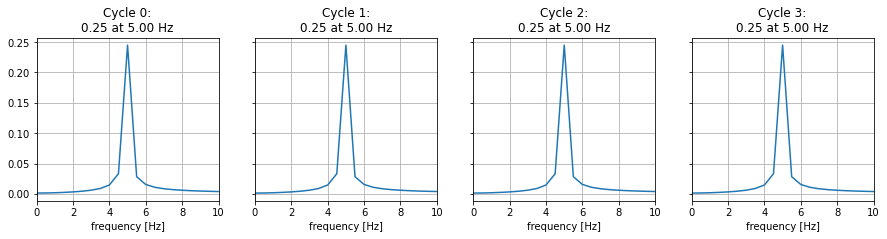

In [77]:
n_cycles_to_display = 4
fft_res_display = fft_cycle_results[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(fft_res_display), figsize=(15, 3), sharex=True, sharey=True)
for i, ax, res in zip(range(n_cycles_to_display), ax, fft_res_display):
    ax.plot(freq, fft_res)
    ax.grid(True)
    ax.set_xlim([0, 10])
    ax.set_xlabel("frequency [Hz]")
    
    k = np.argmax(res)
    magn_max = res_abs[k]
    freq_max = freq[k]
    
    ax.set_title("Cycle %d:\n%.2f at %.2f Hz" % (i, magn_max, freq_max))

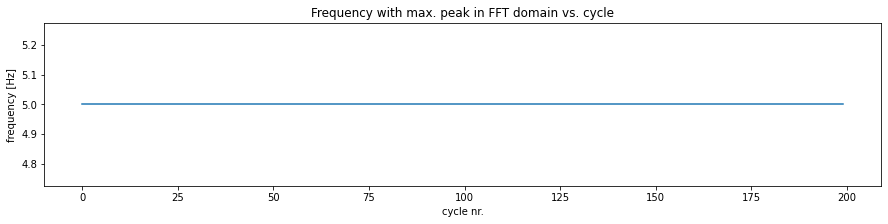

In [78]:
freq_list = list()
for res in fft_cycle_results:
    k = np.argmax(res)
    freq_list.append(freq[k])
    
plt.figure(figsize=(15,3))
plt.plot(freq_list)
plt.xlabel("cycle nr.")
plt.ylabel("frequency [Hz]")
plt.title("Frequency with max. peak in FFT domain vs. cycle");

### Lets look at the angle for each of the cycle
For the sake of our example we will run FFT each $T_{cycle}$ seconds

In [92]:

T_cycle = 2 # seconds
n_cycles = 200
f_cycle = 1/T_cycle
f_s = 100
T_s = 1/f_s
N = int(T_cycle/T_s)
print("Sample frequency:", f_s, "Hz")
print("Sample period:", T_s, "sec")
print("Number of samples required to complete 2 cycles:", N)


fft_cycle_results = list() # result list

# for each cycle
for c in range(n_cycles):
    # determine start and end of a cycle
    t_start = c*T_cycle
    t_end = (c+1)*T_cycle
    
    # sample the signal at according timesteps
    t_sample = np.arange(t_start, t_end, T_s)
    f_sample = f(t_sample, -np.pi/8*t_sample)
    
    # run FFT and append results
    fft_res = fft(f_sample)
    fft_cycle_results.append(fft_res)

fft_cycle_results = [2/N*r[:N//2] for r in fft_cycle_results]
freq = np.arange(0, N//2)*f_s/N
cycle_max_list = list()

for res in fft_cycle_results:
    # calc. the magnitude
    res_abs = np.abs(res)

    
    # find frequency index
    k = np.argmax(res_abs)
    cycle_max_list.append(res[k])

Sample frequency: 100 Hz
Sample period: 0.01 sec
Number of samples required to complete 2 cycles: 200


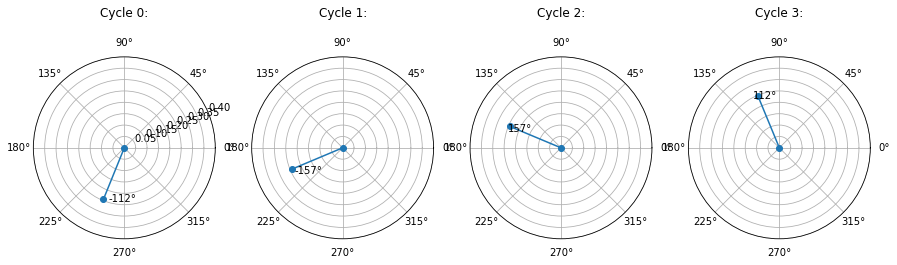

In [93]:
n_cycles_to_display = 4
cycle_max_list_display = cycle_max_list[:n_cycles_to_display]

fig, ax = plt.subplots(ncols=len(cycle_max_list_display), figsize=(15, 30), 
                       subplot_kw={'projection': "polar"}, sharey=True)

for i, ax, res in zip(range(n_cycles_to_display), ax, cycle_max_list_display):
    ax.plot([0, np.angle(res)], [0, np.abs(res)], marker="o")
    ax.text(np.angle(res)+0.1, np.abs(res), "%d°" % int(np.angle(res, deg=True)))
    ax.set_ylim([0, 0.4])
    ax.set_title("Cycle %d:\n" % (i, ))

We can observe that the angle moves in negative direction with $-45^\circ$ = $T_{cycle}v = 2 \frac{\pi}{8} = \frac{\pi}{4}$

## Solution via Phase Difference


In [56]:
angle_diff = np.diff(np.angle(cycle_max_list, deg=True))
angle_vel = angle_diff/T_cycle
print(angle_vel[:10])
v = -np.pi/8*360/(2*np.pi)
print(v)

[-22.57811002 157.25241595 -22.41998496 -22.25432097 -22.57811002
 -22.74758405 -22.41998496 -22.25432097 -22.57811002 157.25241595]
-22.5


In [57]:

angle_vel[angle_vel>0] -= 180
print("Angle velocities:", angle_vel[:10])

Angle velocities: [-22.57811002 -22.74758405 -22.41998496 -22.25432097 -22.57811002
 -22.74758405 -22.41998496 -22.25432097 -22.57811002 -22.74758405]


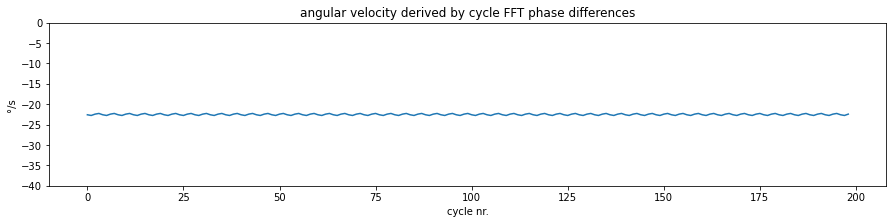

In [58]:
plt.figure(figsize=(15,3))
plt.plot(angle_vel)
plt.xlabel("cycle nr.")
plt.ylabel("°/s")
plt.title("angular velocity derived by cycle FFT phase differences")
plt.ylim([-40, 0]);

## Solution via Second FFT

The core idea of this alternative approach is to extract the periodic change of phase $\phi(t)$.<br>
We can find the phase velocity via a **second FFT over the cycle results**, too. Consider the first FFT result as a measurement/sample for the second FFT.<br><br>

Remember, those are our results (FFT-magnitude from the -component):

In [59]:
cycle_max_list[:5]

[(-0.09177962152642351-0.22644808906297761j),
 (-0.22334337399156695-0.09379786966319806j),
 (-0.22407560703847842+0.09379786966349972j),
 (-0.09354738847923255+0.22644808906302294j),
 (0.09177962152656505+0.22644808906289618j)]

In [60]:
# here, we take only the positive side of fft
second_fft_res = fft(cycle_max_list)[:n_cycles//2]

Like in the introductory example, each element of ```second_fft_res``` represents a frequency component.

In [65]:
freq_second = np.arange(0, n_cycles//2)*f_cycle/n_cycles
omega_second = 360*freq_second  # same as 2*np.pi*

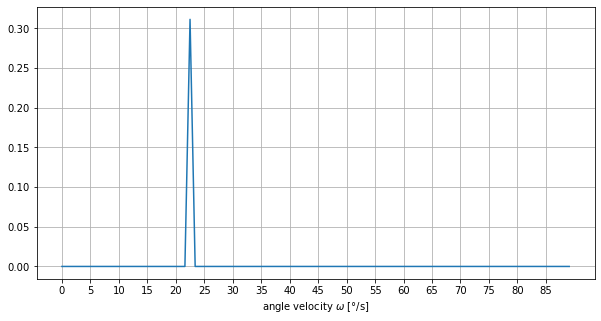

In [66]:
plt.figure(figsize=(10,5))
plt.plot(omega_second, np.abs(second_fft_res))
plt.grid()
plt.xlabel("angle velocity $\omega$ [°/s]")
plt.xticks(range(0, 90, 5));

As you could see we could detect the phase change $v=22.5 ^\circ$ with a second FFT on the results of the first FFT.